# Tarea 1

Matías Deneken


In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [59]:
df = pd.read_excel("bbdd/MigrantesChile (2005-2016).xlsx")

def glimpse(df):
    print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")
    print(df.dtypes)
    print("\nPrimeras 5 filas:")
    print(df.head())

# Usar la función con tu DataFrame
glimpse(df)


Filas: 177, Columnas: 16

ID Continent     int64
Continent       object
ID Country       int64
Country         object
2005             int64
2006             int64
2007             int64
2008             int64
2009             int64
2010             int64
2011             int64
2012             int64
2013             int64
2014             int64
2015             int64
2016             int64
dtype: object

Primeras 5 filas:
   ID Continent Continent  ID Country      Country  2005  2006  2007  2008  \
0           142      Asia         308  Afghanistan     8     4     5     1   
1           150    Europe         518      Albania     2     1     1     2   
2           150    Europe         563      Germany   495   481   562   614   
3           150    Europe         525      Andorra     2     1     1     1   
4             2    Africa         140       Angola     1     2     4     3   

   2009  2010  2011  2012  2013  2014  2015  2016  
0     2     1     3     6    15     4    12    15  


# 1 pregunta



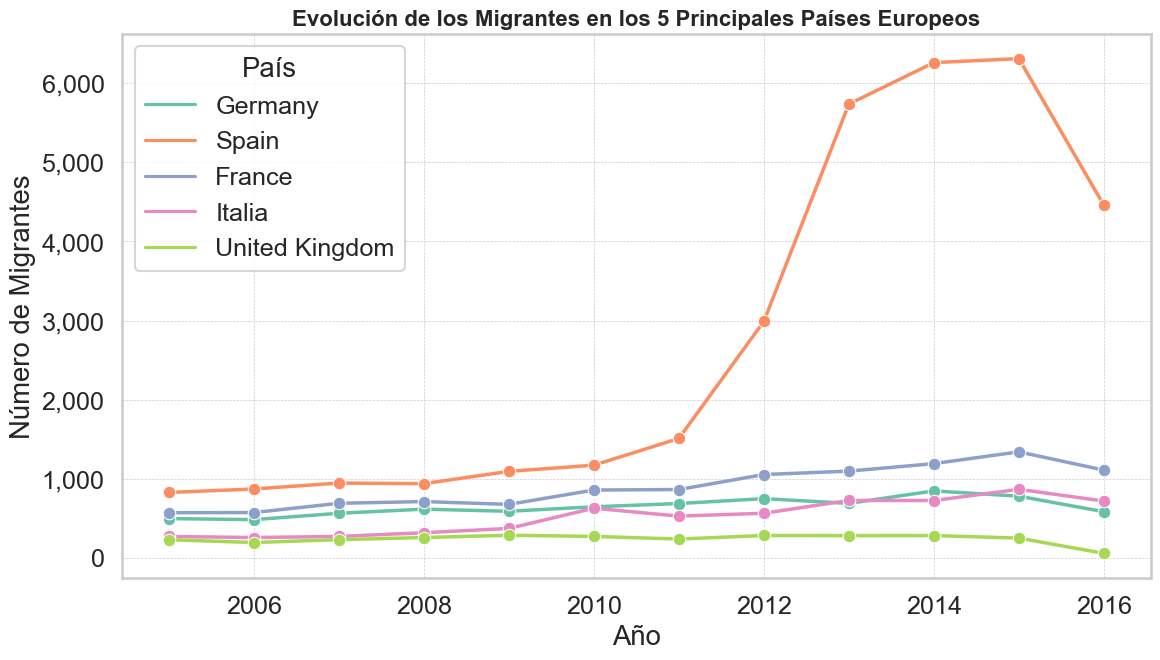

In [60]:

# Estilo general del gráfico
sns.set(style="whitegrid", context="talk", font_scale=1.1)

# Transformar a formato largo
df_long = df.melt(
    id_vars=["ID Continent", "Continent", "ID Country", "Country"],
    var_name="Year",
    value_name="Migrants"
)

# Filtrar años numéricos y convertir a int
df_long = df_long[df_long["Year"].astype(str).str.isnumeric()].copy()
df_long["Year"] = df_long["Year"].astype(int)

# Filtrar solo Europa y calcular totales
df_europe = df[df["Continent"] == "Europe"].copy()
df_europe["Total"] = df_europe.iloc[:, 4:].sum(axis=1)

# Top 5 países europeos con más migrantes
top5_europe = df_europe.nlargest(5, "Total")

# Filtrar datos largos para esos países
df_top5_long = df_long[df_long["Country"].isin(top5_europe["Country"])]

# Visualización
plt.figure(figsize=(12, 7))
palette = sns.color_palette("Set2", n_colors=5)
sns.lineplot(
    data=df_top5_long,
    x="Year",
    y="Migrants",
    hue="Country",
    marker="o",
    palette=palette,
    linewidth=2.5
)

plt.title("Evolución de los Migrantes en los 5 Principales Países Europeos", fontsize=16, weight='bold')
plt.xlabel("Año")
plt.ylabel("Número de Migrantes")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Formato de miles con coma
plt.legend(title="País", loc='upper left', frameon=True)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# 2 pregunta

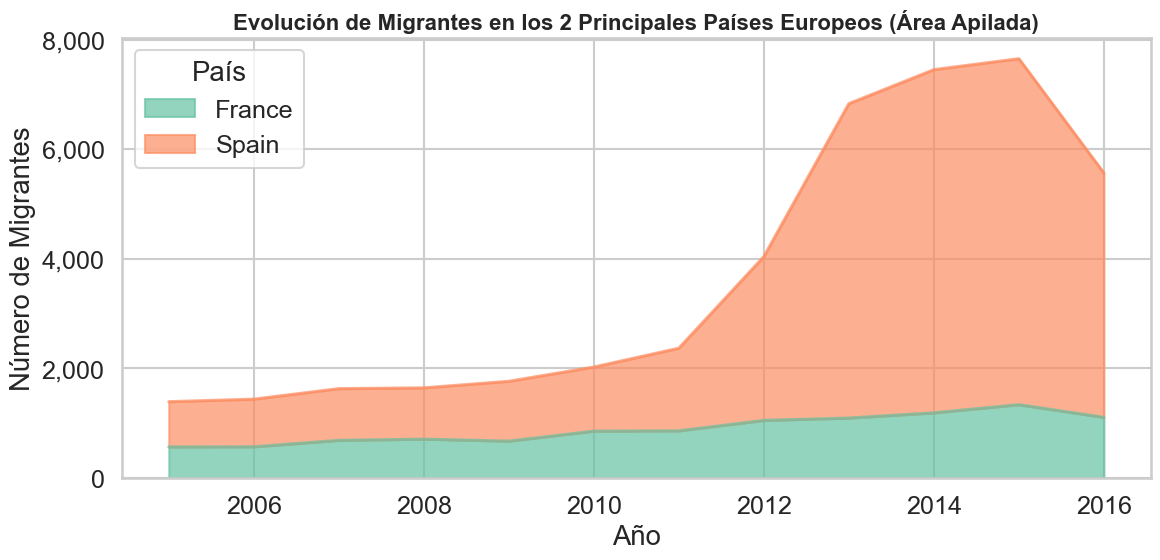

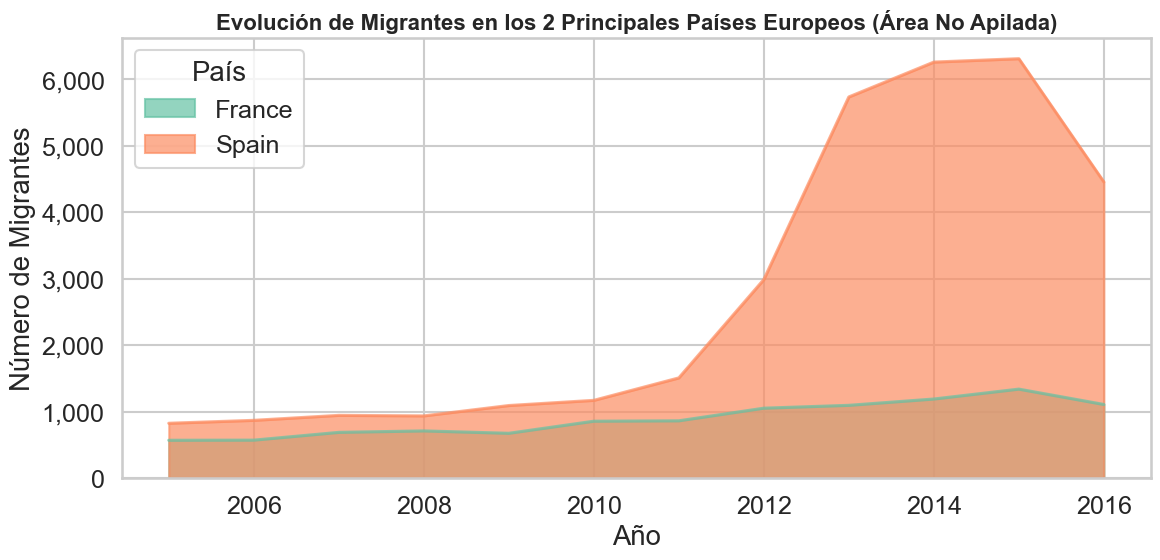

In [61]:
# 2. Área plot apilado y no apilado

# Seleccionar los dos países con más migrantes
top2 = top5_europe.nlargest(2, "Total")["Country"]
df_top2_long = df_long[df_long["Country"].isin(top2)]

# Pivotear para formato adecuado a gráfico de área
df_pivot = df_top2_long.pivot(index="Year", columns="Country", values="Migrants").sort_index()

# Paleta de colores armónica
colors = sns.color_palette("Set2", n_colors=2)

# Gráfico de área apilado
fig, ax = plt.subplots(figsize=(12, 6))
df_pivot.plot(kind="area", stacked=True, alpha=0.7, ax=ax, color=colors)
ax.set_title("Evolución de Migrantes en los 2 Principales Países Europeos (Área Apilada)", fontsize=16, weight='bold')
ax.set_xlabel("Año")
ax.set_ylabel("Número de Migrantes")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.legend(title="País", loc="upper left")
plt.tight_layout()
plt.show()

# Gráfico de área no apilado
fig, ax = plt.subplots(figsize=(12, 6))
df_pivot.plot(kind="area", stacked=False, alpha=0.7, ax=ax, color=colors)
ax.set_title("Evolución de Migrantes en los 2 Principales Países Europeos (Área No Apilada)", fontsize=16, weight='bold')
ax.set_xlabel("Año")
ax.set_ylabel("Número de Migrantes")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.legend(title="País", loc="upper left")
plt.tight_layout()
plt.show()


# 3 pregunta

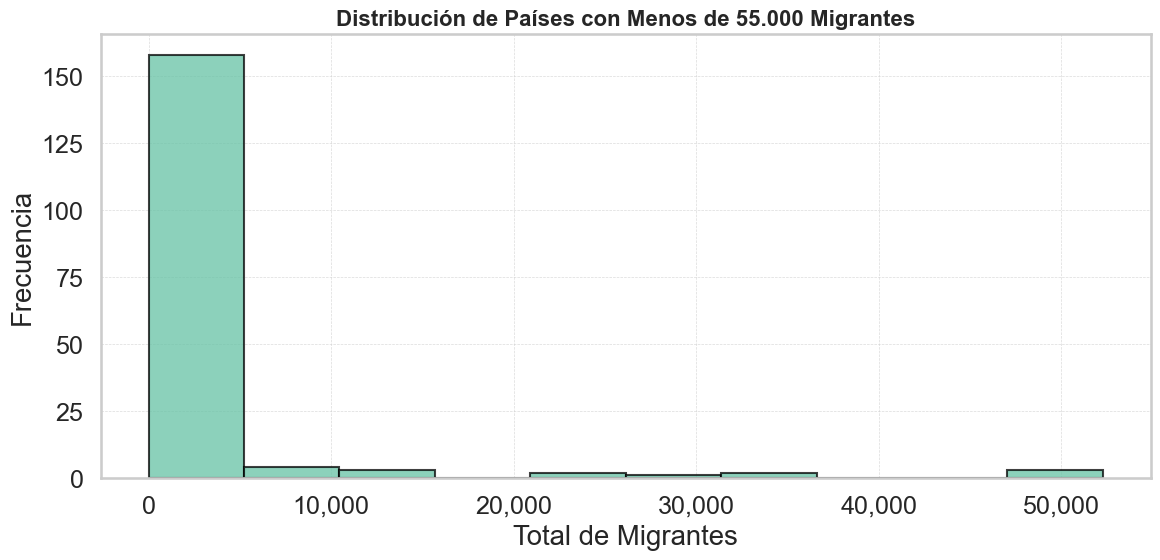

In [62]:
# Calcular total de migrantes por país
total_migrants = df.set_index("Country").iloc[:, 4:].sum(axis=1)

# Filtrar países con <= 55.000 migrantes
df_filtered = total_migrants[total_migrants <= 55000]

# Crear histograma elegante
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_filtered, bins=10, alpha=0.75, edgecolor='black', color="#66c2a5")

ax.set_title("Distribución de Países con Menos de 55.000 Migrantes", fontsize=16, weight='bold')
ax.set_xlabel("Total de Migrantes")
ax.set_ylabel("Frecuencia")
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


# 4 pregunta

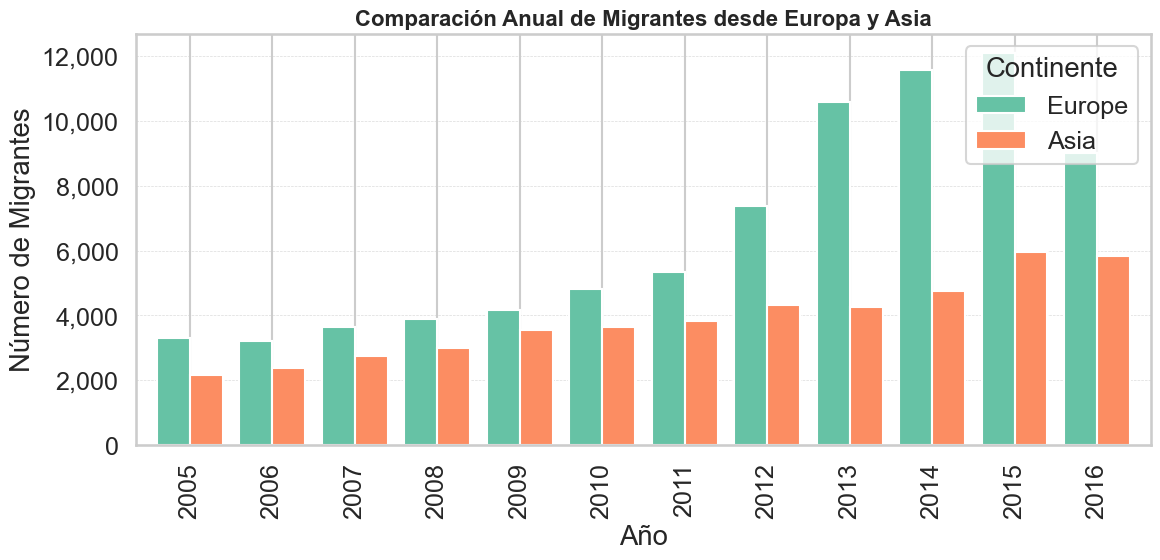

In [63]:
# Agrupar por continente y año
df_continent = df_long.groupby(["Year", "Continent"])["Migrants"].sum().unstack()

# Seleccionar Europa y Asia
df_eurasia = df_continent[["Europe", "Asia"]]

# Crear gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(12, 6))
df_eurasia.plot(kind="bar", ax=ax, width=0.8, color=sns.color_palette("Set2", n_colors=2))

ax.set_title("Comparación Anual de Migrantes desde Europa y Asia", fontsize=16, weight='bold')
ax.set_xlabel("Año")
ax.set_ylabel("Número de Migrantes")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.legend(title="Continente", loc="upper right")
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


# 5ta pregunta

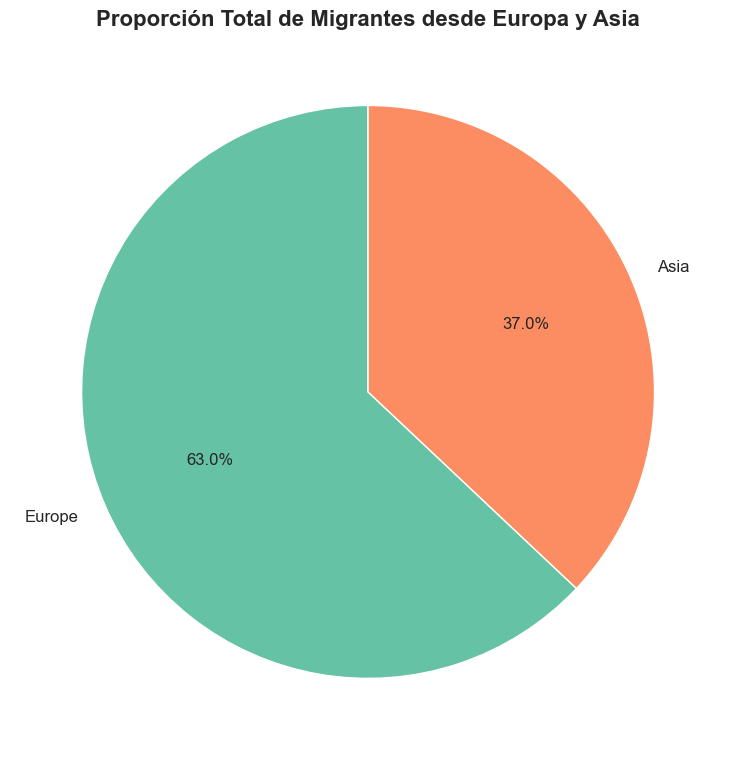

In [64]:
# Calcular migrantes totales por continente
total_migrants_continent = df_long.groupby("Continent")["Migrants"].sum()
total_migrants_continent = total_migrants_continent.loc[["Europe", "Asia"]]

# Colores suaves
colors = sns.color_palette("Set2", n_colors=2)

# Pie chart estilizado
fig, ax = plt.subplots(figsize=(8, 8))
total_migrants_continent.plot(
    kind="pie",
    autopct="%.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 1},
    textprops={"fontsize": 12},
    ax=ax
)

ax.set_title("Proporción Total de Migrantes desde Europa y Asia", fontsize=16, weight='bold')
ax.set_ylabel("")
plt.tight_layout()
plt.show()



# 6 pregunta

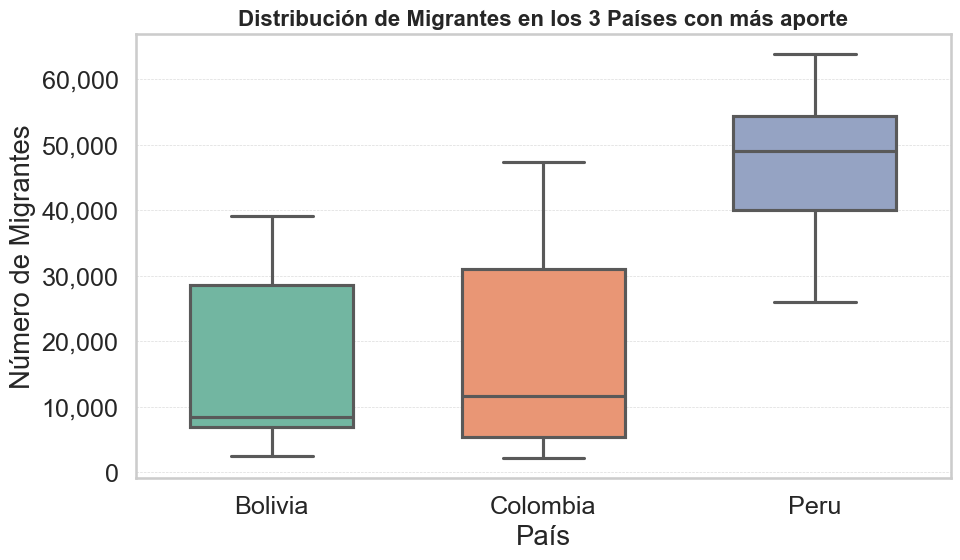

In [65]:
# Identificar los 3 países con mayor número total de migrantes
top3_countries = df.set_index("Country").iloc[:, 4:].sum(axis=1).nlargest(3).index
df_top3_long = df_long[df_long["Country"].isin(top3_countries)]

# Box-and-whisker estilizado
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_top3_long, x="Country", y="Migrants", palette="Set2", width=0.6)

ax.set_title("Distribución de Migrantes en los 3 Países con más aporte", fontsize=16, weight='bold')
ax.set_xlabel("País")
ax.set_ylabel("Número de Migrantes")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

